In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_excel('Online Retail.xlsx')

In [3]:
# Handle missing values and negative quantities
df.dropna(subset=['CustomerID'], inplace=True)
df = df[df['Quantity'] > 0]

In [4]:
# Clean the 'Description' column
df['Description'] = df['Description'].str.strip()
df['Description'] = df['Description'].str.lower()

In [6]:
# Add a new column for the total sales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [7]:
# Calculate total sales and number of orders
total_sales = df['TotalSales'].sum()
num_orders = df['InvoiceNo'].nunique()

In [8]:
# Calculate sales by country
sales_by_country = df.groupby('Country').sum()[['TotalSales']]
sales_by_country = sales_by_country.sort_values('TotalSales', ascending=False)

In [9]:
# Calculate top 10 products by sales
top_products = df.groupby('Description').sum()[['TotalSales']]
top_products = top_products.sort_values('TotalSales', ascending=False).head(10)

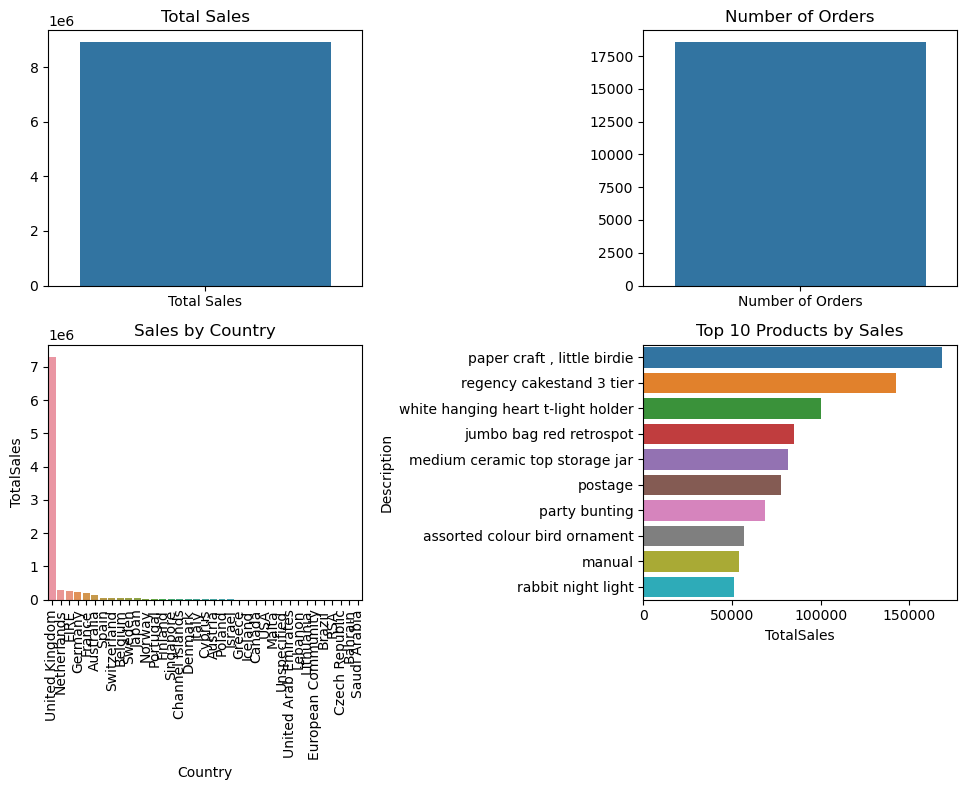

In [10]:
# Create a 2x2 grid of plots for the dashboard
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot total sales
sns.barplot(x=['Total Sales'], y=[total_sales], ax=axs[0, 0])
axs[0, 0].set_title('Total Sales')

# Plot number of orders
sns.barplot(x=['Number of Orders'], y=[num_orders], ax=axs[0, 1])
axs[0, 1].set_title('Number of Orders')

# Plot sales by country
sns.barplot(x=sales_by_country.index, y=sales_by_country['TotalSales'], ax=axs[1, 0])
axs[1, 0].set_title('Sales by Country')
axs[1, 0].set_xticklabels(sales_by_country.index, rotation=90)

# Plot top 10 products
sns.barplot(x=top_products['TotalSales'], y=top_products.index, ax=axs[1, 1])
axs[1, 1].set_title('Top 10 Products by Sales')

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()